In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [26]:
x_train = np.array([1.0,1.7,2.0,2.5,3.0,3.2]) #the train set built with numpy
y_train = np.array([250.0,300.0,480.0,430.0,500.0,630.0])
print(f'x_train: {x_train} and x_train shape: {x_train.shape}')
print(f'y_train: {y_train} and y_train shape: {y_train.shape}')
m = x_train.shape[0] #m is the number of training examples
print(f'number of training examples: m = {m}')

x_train: [1.  1.7 2.  2.5 3.  3.2] and x_train shape: (6,)
y_train: [250. 300. 480. 430. 500. 630.] and y_train shape: (6,)
number of training examples: m = 6


Model function
f(x) = w *x +b

In [27]:
w= 100 # pendiente
b = 100 #ordenada al origen

In [28]:
def compute_model_output(x,w,b):

    m = x.shape[0]

    f_wb = np.zeros(m) #gets an array with len of m (the shape of traning set)
                        #and holds the for loop
    for i in range(m):
        f_wb[i] = w *x[i] + b

    return f_wb

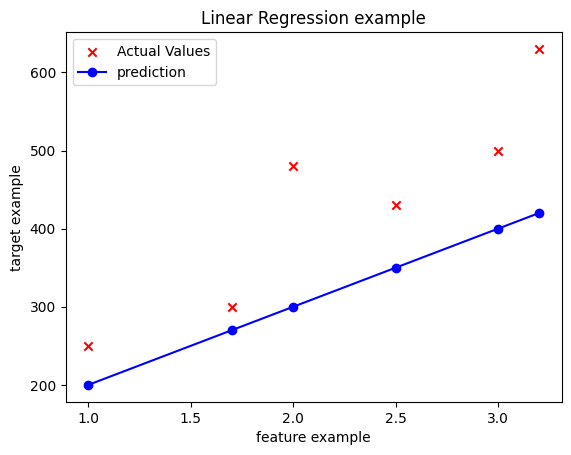

In [29]:
tmp_f_wb = compute_model_output(x_train,w,b) #function

#data points
plt.scatter(x_train,y_train, marker ='x', c='r',label='Actual Values')

#Model plot
plt.plot(x_train,tmp_f_wb,marker='o',c='b',label='prediction')

plt.title('Linear Regression example')
plt.ylabel('target example')
plt.xlabel('feature example')
plt.legend()
plt.show()




In [30]:
def compute_cost(x,y,w,b): #compute the cost function for linear regression

    m = x.shape[0]

    cost_sum= 0

    for i in range(m):
        f_wb = w * x[i] +b
        cost = (f_wb - y[i])**2 #error
        cost_sum +=cost #suma total

    total_cost = (1/(2*m)) * cost_sum

    return total_cost

In [31]:
cost_function = compute_cost(x_train,y_train,w,b)

cost_function

8025.0

In [32]:
w = np.arange(0,400)

In [41]:
def cost_vs_w(x,y,w,b):


    m = x.shape[0]
    total= []
    for w_value in w:
        
        cost_sum= 0

        for i in range(m):
            f_wb = w_value * x[i] +b
            cost = (f_wb - y[i])**2 #error
            cost_sum +=cost #suma total

        total_cost = (1/(2*m)) * cost_sum
        total.append(total_cost)

    return total
    

In [44]:
costos = cost_vs_w(x_train,y_train,w,b) #todos valores posibles de cost function


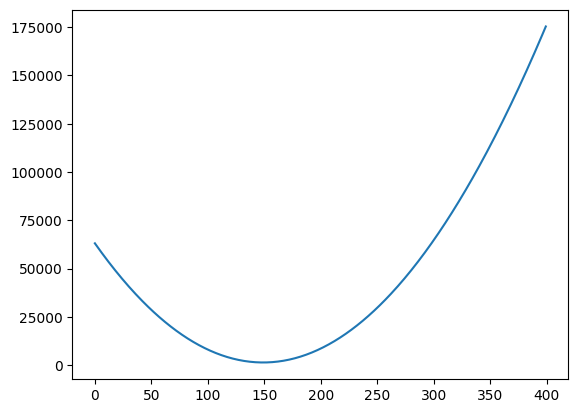

In [45]:
plt.plot(w,costos)

plt.show()

Derivada parcial de la cost function

w = w-alpha d/dw J(w,b)

b= b-alpha d/db J(w,b)

siendo alpha el learning rate y J(w,b) la cost function

In [ ]:
def compute_gradient(x,y,w,b):
    
    m = x.shape[0]
    dj_dw =0
    dj_db= 0

    for i in range(m):

        f_wb = w *[i] +b #funcion

        dj_dw_i = (f_wb - y[i] ) *x[i] #derivada de w para cada valor dado de i
        dj_db_i = (f_wb - y[i])    # derivada de b para cada valor dado de i
        dj_dw += dj_dw_i  #suma derivadas totales de w
        dj_db += dj_db_i  #suma derivadas totales de b

    dj_dw = dj_dw/ m #divido por m para completar la formula
    dj_db = dj_db / m

    return dj_dw , dj_db


In [2]:
def gradient_descendent(x,y, w_in ,b_in, alpha, num_iters, cost_function, gradient_function):

    J_history = [] # history of cost values
    p_history = [] # history of parameters [w,b]
    w = w_in
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = compute_gradient(x,y,w,b)

        w = w - alpha * dj_dw #alpha learning rate
        b = b - alpha * dj_db


        J_history.append(cost_function(x,y,w,b))

        p_history.append([w,b])

        if i % math.ceil(num_iters/10) == 0:
            print(f'Iteration {i:4}: Cost {J_history[-1]:0.2e}',
                  f'dj_dw: {dj_dw:0.3e},dj_db: {dj_db: 0.3e}',
                  f'w: {w:0.3e},b:{b:0.5e}')
            
    return w,b, J_history,p_history


In [ ]:
w